In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from math import log10

# %matplotlib inline
start_time = datetime.now()

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
data = pd.read_csv('card transactions.csv')

In [3]:
data.shape

(96753, 10)

In [4]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
# data['Date'] = data['Date'] + pd.offsets.DateOffset(years=-4)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [7]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [8]:
data.count() * 100 / len(data)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

# Recnum

In [9]:
len(data['Recnum'].unique())

96753

# Cardnum

In [10]:
len(data['Cardnum'].unique())

1645

Text(0.5, 1.0, 'top 20 card numbers')

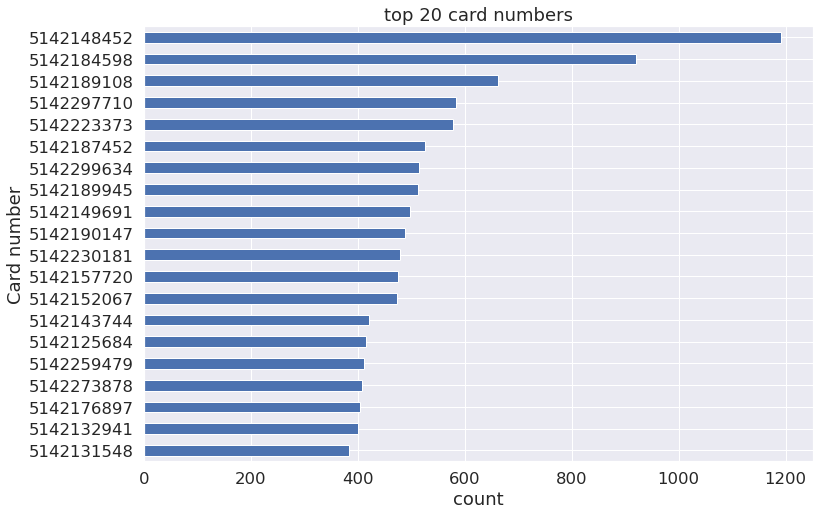

In [11]:
data['Cardnum'].value_counts().head(20).sort_values().plot(kind = 'barh')
plt.ylabel('Card number')
plt.xlabel('count')
plt.title('top 20 card numbers')

# Date

In [12]:
len(data['Date'].unique())

365

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

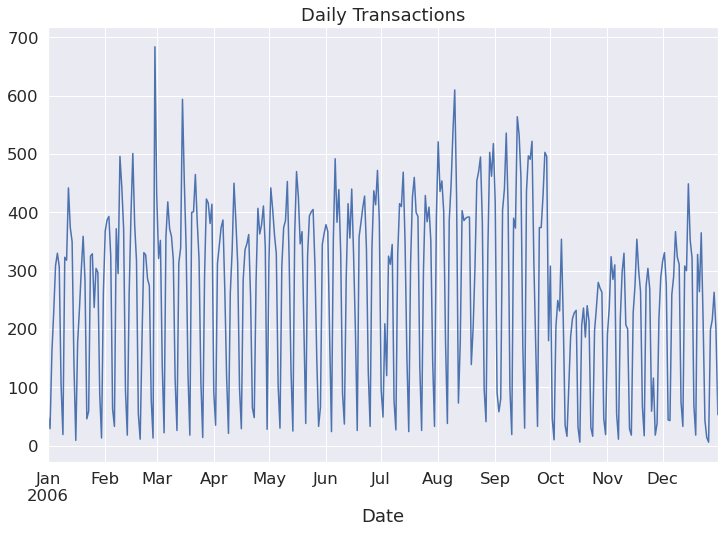

In [13]:
data.groupby('Date')['Recnum'].count().plot(title = 'Daily Transactions')

In [14]:
# data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 7))\
#     .count().trx.plot(title = 'Weekly Transactions, ignore last point')

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

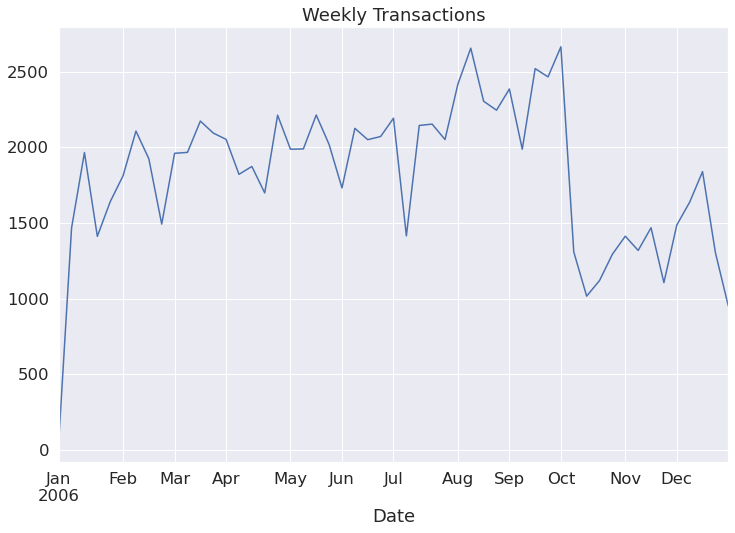

In [15]:
data.set_index(data['Date']).resample('W')['Recnum'].count().plot(title = 'Weekly Transactions')

In [16]:
# data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 30))\
#     .count().trx.plot(title = 'Approximately Monthly Transactions, ignore last point')

<AxesSubplot:title={'center':'Monthly Transactions'}, xlabel='Date'>

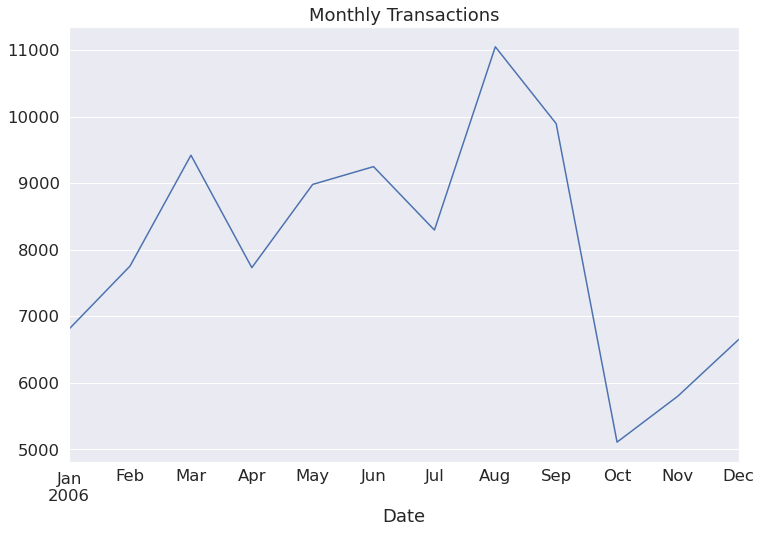

In [17]:
data.set_index(data['Date']).resample('M')['Recnum'].count().plot(title = 'Monthly Transactions')

# Merchnum

In [18]:
len(data['Merchnum'].unique())

13092

In [19]:
data['Merchnum'].value_counts().head(10)

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
Name: Merchnum, dtype: int64

Text(0.5, 1.0, 'top 20 merchant numbers')

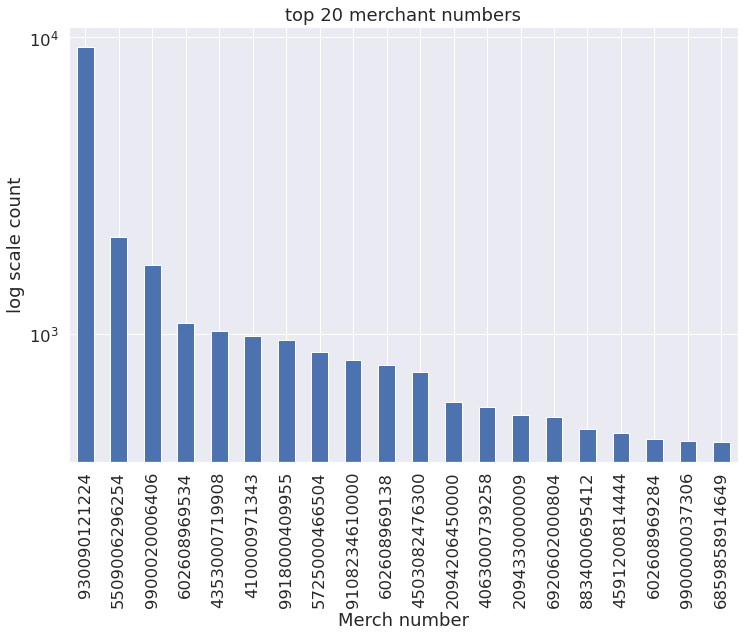

In [20]:
data['Merchnum'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log')
#plt.ylim(bottom = 100)
plt.xlabel('Merch number')
plt.ylabel('log scale count')
plt.title('top 20 merchant numbers')

# Merch description

In [21]:
len(data['Merch description'].unique())

13126

Text(0.5, 1.0, 'top 20 merchant descriptions')

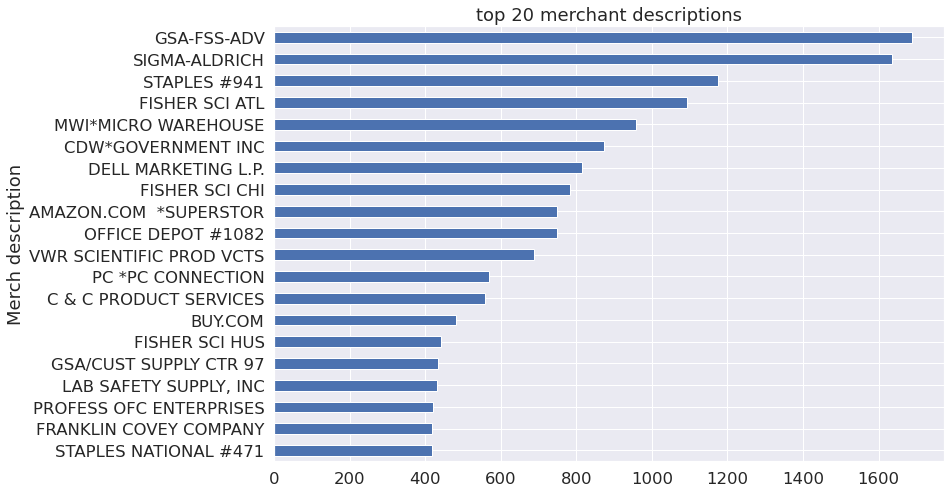

In [22]:
data['Merch description'].value_counts().head(20).sort_values().plot(kind='barh')
plt.ylabel('Merch description')
plt.title('top 20 merchant descriptions')

# Merch state

In [23]:
len(data['Merch state'].unique())

228

Text(0.5, 1.0, 'top 20 states')

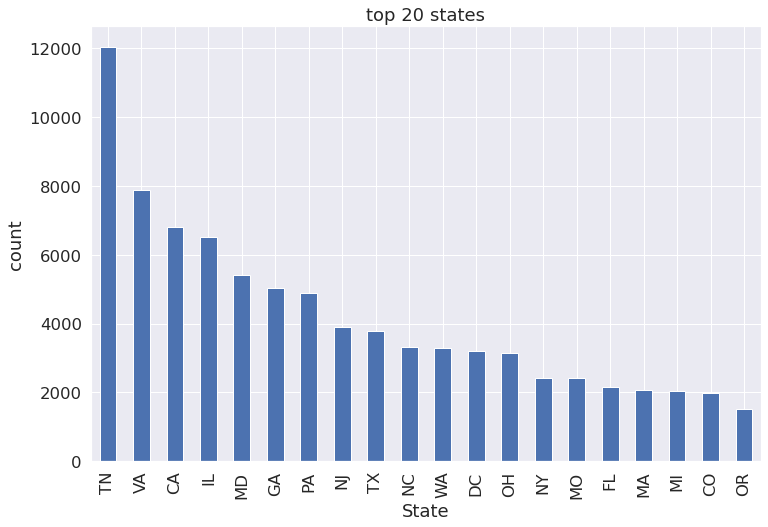

In [24]:
data['Merch state'].value_counts().head(20).plot(kind="bar")
plt.xlabel('State')
plt.ylabel('count')
plt.title('top 20 states')

# Merch zip

In [25]:
len(data['Merch zip'].unique())

4568

Text(0.5, 1.0, 'top 20 zip codes')

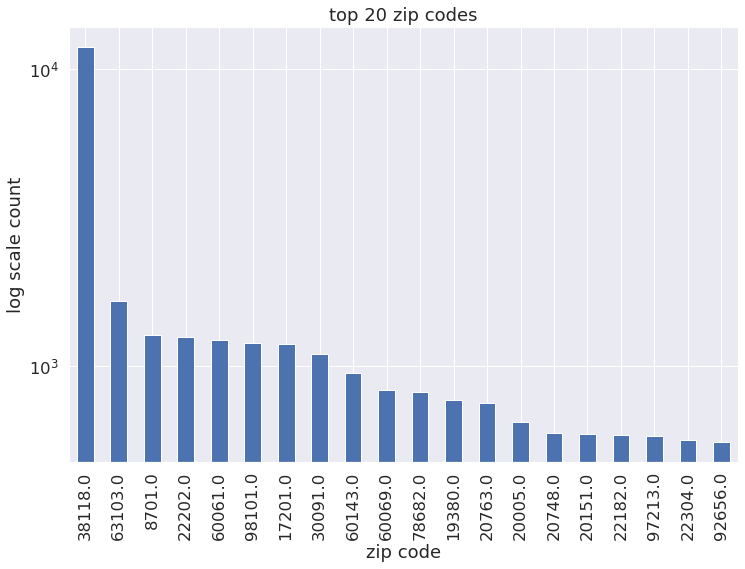

In [26]:
data['Merch zip'].value_counts().head(20).plot(kind="bar")
plt.yscale('log')
plt.xlabel('zip code')
plt.ylabel('log scale count')
plt.title('top 20 zip codes')

# Transtype

Text(0.5, 1.0, 'Transaction Type')

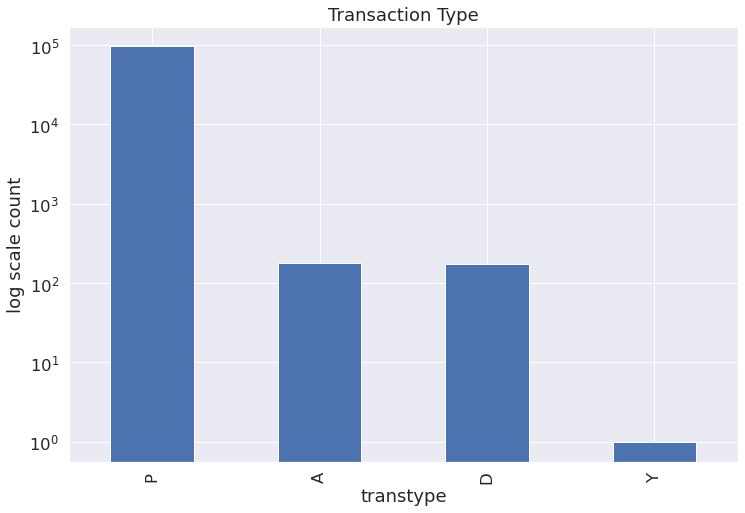

In [27]:
data['Transtype'].value_counts().plot(kind='bar')
plt.yscale('log')
plt.xlabel('transtype')
plt.ylabel('log scale count')
plt.title('Transaction Type')

# Amount

In [28]:
pd.options.display.float_format = '{:.2f}'.format
data['Amount'].describe().reset_index()

,index,Amount
0,count,96753.00
1,mean,427.89
2,std,10006.14
3,min,0.01
4,25%,33.48
5,50%,137.98
6,75%,428.20
7,max,3102045.53


(0.1, 171768.2728626341)

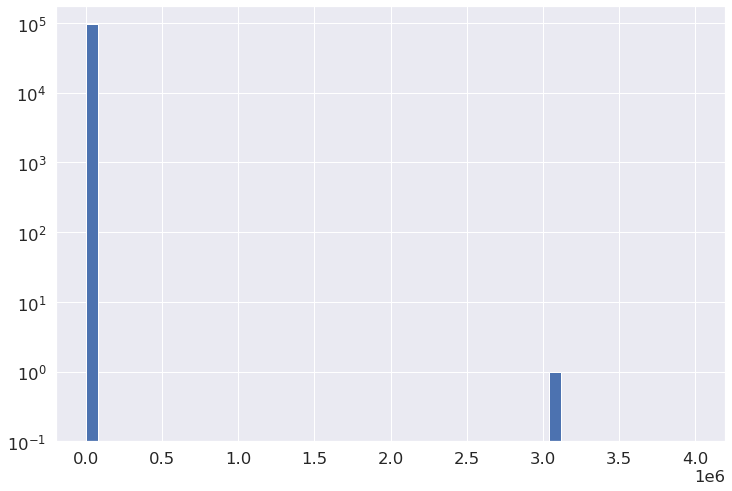

In [29]:
plt.hist(data['Amount'],bins=50,range=[0,4000000])
plt.yscale('log')
plt.ylim(bottom = .1)

In [30]:
len(data[data['Amount'] < 4000])/data.shape[0]

0.9949768999410871

Text(0.5, 1.0, 'Transaction Amount')

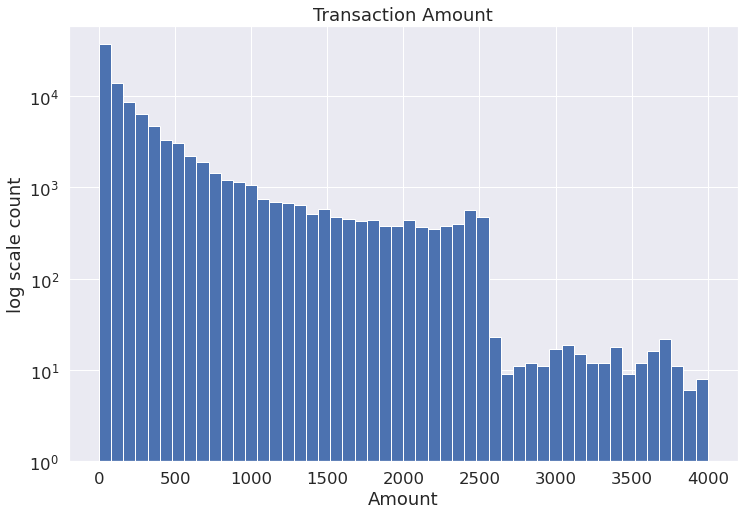

In [31]:
plt.hist(data['Amount'],bins=50,range=[0,4000])
plt.yscale('log')
plt.ylim(bottom = 1)
plt.xlabel('Amount')
plt.ylabel('log scale count')
plt.title('Transaction Amount')

# Fraud

In [32]:
data['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

Text(0.5, 1.0, 'Fraud Label')

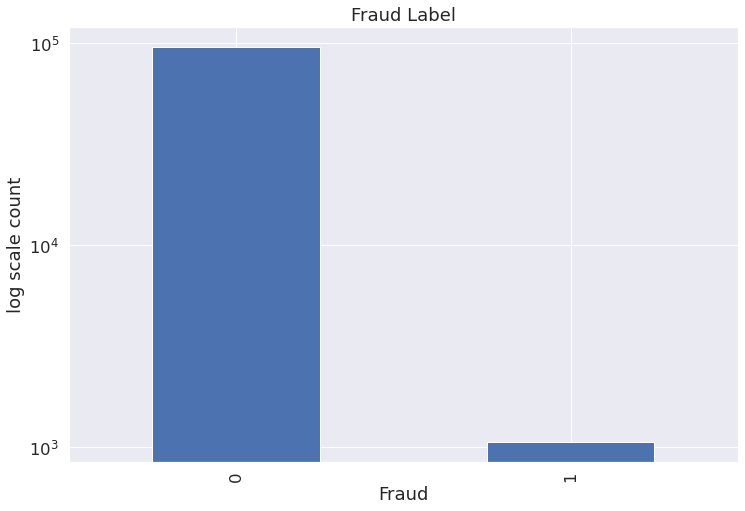

In [33]:
data['Fraud'].value_counts().plot(kind='bar')
plt.yscale('log')
plt.xlabel('Fraud')
plt.ylabel('log scale count')
plt.title('Fraud Label')

# Day of Week

<AxesSubplot:>

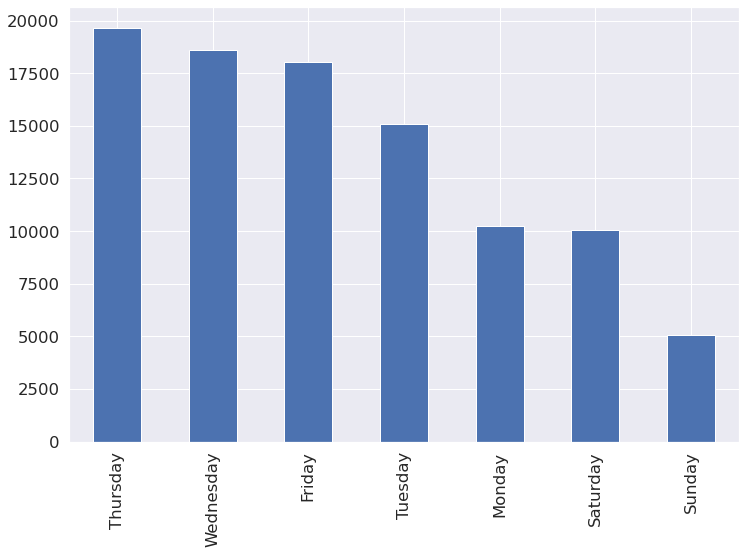

In [34]:
data['DOW'] = data['Date'].dt.day_name()
data['DOW'].value_counts().plot(kind = 'bar')

# Time series plots (Non Fraud vs Fraud)

In [35]:
# remove exclusions: only keep the type P's and remove one high transaction outlier
temp = data[data['Transtype'] == 'P']
trans = temp[temp['Amount'] <= 1000000]
trans = trans.reset_index(drop=True)
trans.shape

(96397, 11)

In [36]:
goods = trans[trans['Fraud'] == 0]
bads = trans[trans['Fraud'] == 1]
ngoods = len(goods)
nbads = len(bads)
print("# goods:", ngoods)
print("# bads:", nbads)
print("overall fraud rate:", round(len(bads) / len(trans),3))

# goods: 95338
# bads: 1059
overall fraud rate: 0.011


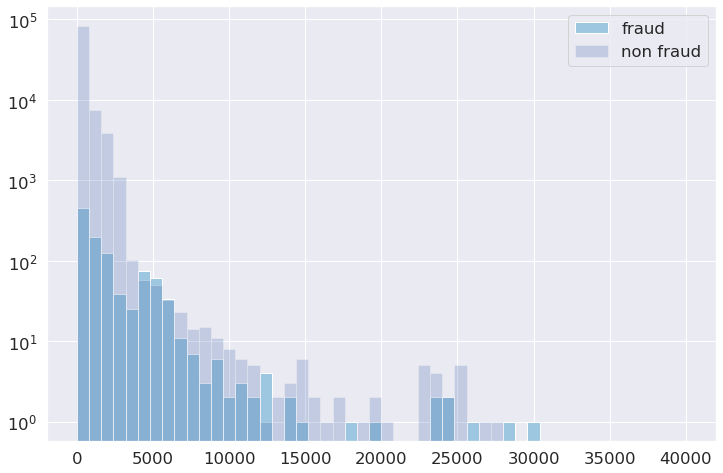

In [37]:
plt.hist(bads['Amount'],bins=50,range=[0,40000], color='#9dc6e0', label='fraud')
plt.hist(goods['Amount'],bins=50,range=[0,40000], alpha=0.25,label='non fraud')
plt.legend()
plt.yscale('log')

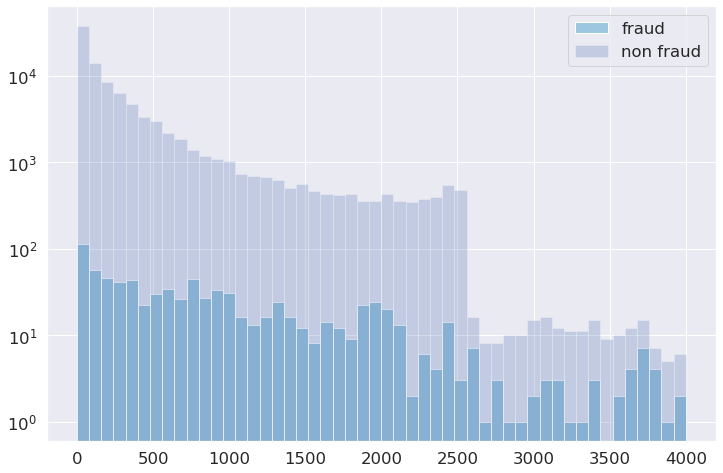

In [38]:
plt.hist(bads['Amount'],bins=50,range=[0,4000], color='#9dc6e0', label='fraud')
plt.hist(goods['Amount'],bins=50,range=[0,4000], alpha=0.25,label='non fraud')
plt.legend()
plt.yscale('log')

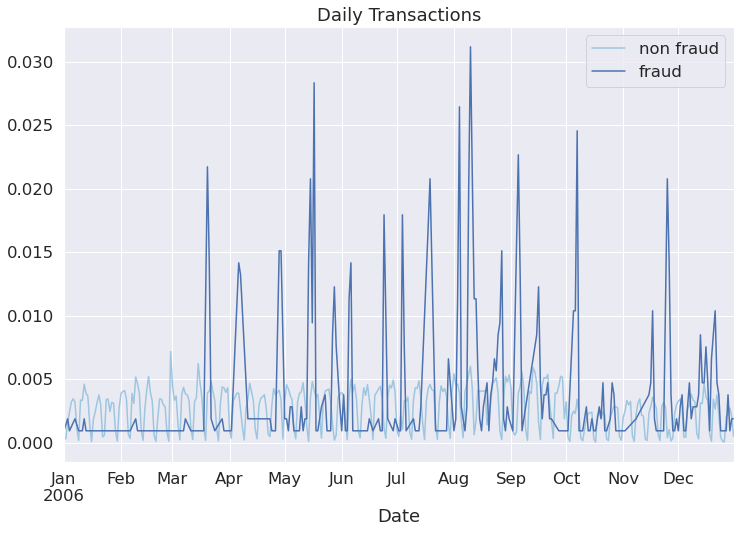

In [39]:
goods_series = goods.groupby('Date')['Recnum'].count()
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(color='#9dc6e0', label='non fraud')
bads_series = bads.groupby('Date')['Recnum'].count()
norm_bads_series = bads_series / nbads
norm_bads_series.plot(label='fraud')
plt.title('Daily Transactions')
plt.legend()

Text(0.5, 1.0, 'Weekly Transactions')

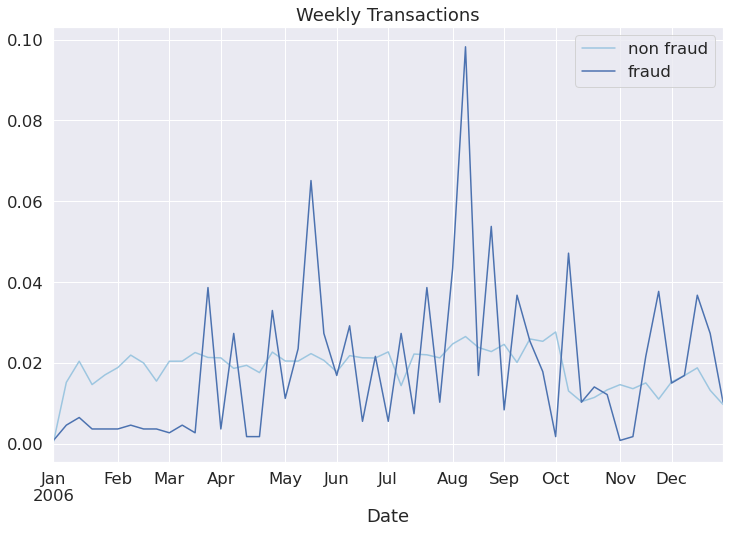

In [40]:
goods_series = goods.set_index(goods['Date']).resample('W')['Recnum'].count()
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(color='#9dc6e0', label='non fraud')
bads_series = bads.set_index(bads['Date']).resample('W')['Recnum'].count()
norm_bads_series = bads_series / nbads
norm_bads_series.plot(label='fraud')

plt.legend()
plt.title('Weekly Transactions')

Text(0.5, 1.0, 'Monthly Transactions')

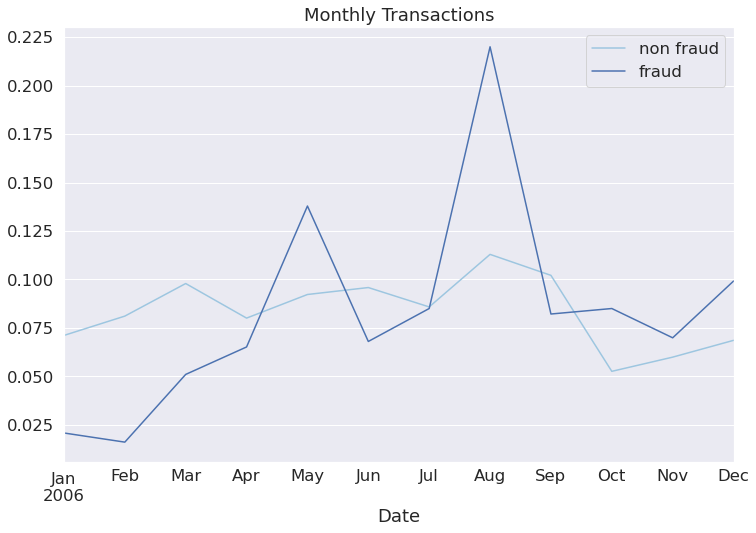

In [41]:
goods_series = goods.set_index(goods['Date']).resample('M')['Recnum'].count()
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(color='#9dc6e0', label='non fraud')
bads_series = bads.set_index(bads['Date']).resample('M')['Recnum'].count()
norm_bads_series = bads_series / nbads
norm_bads_series.plot(label='fraud')

plt.legend()
plt.title('Monthly Transactions')

In [42]:
stop_time = datetime.now()
print('duration: ', stop_time - start_time)

duration:  0:00:05.705076
